# Twitter @WeRateDogs - Data Wrangling and Analysis



## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gathering">Gathering</a></li>
<li><a href="#assess">Assessment</a></li>    
<li><a href="#clean">Cleaning</a></li>
<li><a href="#analysis">Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This project's aim is to gather, access and clean the data from @WeRateDogs twitter account. Once the data is cleaned it will be analysed to showcase some interesting insights into the dogs and the connected accounts from the Twitter account data.  The @WeRateDogs account is an aggragation of pictures of dogs that are posted almost daily where the dogs are rated on cuteness. The ratings are on a 10 scale but the ratings can exceed the 10 rating. This will be apparent in the analysis portion of the project. 

<a id='gathering'></a>
## Gathering Data

In [1]:
#Import needed libraries
import json
import tweepy
import numpy as np
import pandas as pd
import requests
import os
import time
import pprint as pp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Read "twitter-archive-enhanced.csv" into dataframe
ta_df = pd.read_csv("twitter-archive-enhanced.csv")

In [3]:
#Download and Get image prediction tsv file from url below & open
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image-predictions.tsv', mode = 'wb') as file:
         file.write(response.content)

In [4]:
#read image predictions to dataframe
img_df = pd.read_csv('image-predictions.tsv', sep ='\t')

In [5]:
#Twitter API Keys
consumer_key = 'key'
consumer_secret = 'secret'
access_token = 'token'
access_secret = 'a_secret'

In [6]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
api = tweepy.API(auth,
                 wait_on_rate_limit=True,
                 wait_on_rate_limit_notify=True)

In [19]:
#Get JSON info from twitter archive data and write into tweet_json.txt
start = time.time()

with open('tweet_json.txt', mode = 'w') as file:
     for tweet_id in ta_df['tweet_id']:
        try:
            status = api.get_status(tweet_id)
            json_str = json.dumps(status._json)
        except:
            continue
        file.write(json_str + '\n')
        
end = time.time()
print(end-start)

Rate limit reached. Sleeping for: 250
Rate limit reached. Sleeping for: 762
Rate limit reached. Sleeping for: 773


2137.7174944877625


In [7]:
#Pretty Print line of tweet from tweet_json.txt to get format of file
with open('tweet_json.txt') as tweet_json:
    line = tweet_json.readline()
    tweet = json.loads(line)
    pp.pprint(tweet)     

{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'entities': {'hashtags': [],
              'media': [{'display_url': 'pic.twitter.com/MgUWQ76dJU',
                         'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
                         'id': 892420639486877696,
                         'id_str': '892420639486877696',
                         'indices': [86, 109],
                         'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
                         'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
                         'sizes': {'large': {'h': 528,
                                             'resize': 'fit',
                                             'w': 540},
                                   'medium': {'h': 528,
                                              'resize': 'fit',
                                              'w': 540},
           

In [8]:
#Place tweet_json.txt into dataframe within three columns the text file.  
#Tweet id, favorites, retweets
with open('tweet_json.txt') as json_file:
    json_df = pd.DataFrame(columns = ['tweet_id', 
                                        'favorites', 
                                        'retweets'])
    for line in json_file:
        tweet = json.loads(line)
        json_df = json_df.append({
            'tweet_id': tweet['id'],
            'favorites': tweet['favorite_count'],
            'retweets': tweet['retweet_count']
        }, ignore_index=True)

<a id='assess'></a>
## Assessment of Data

Now that the data has been gathered, the next step is to identify what data issues need to be tidied and fixed. Also, missing data will be identified and fixed as well. We will first look at the basic outline of the data before we dive into each dataframe's individual issues.

In [9]:
#Check to see the breakdown of the json info
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
tweet_id     2340 non-null object
favorites    2340 non-null object
retweets     2340 non-null object
dtypes: object(3)
memory usage: 54.9+ KB


In [10]:
#Look at data types, number of enteries per column
ta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
#Look at shape of twitter archive data
ta_df.shape

(2356, 17)

In [12]:
#check first 5 rows, get a picture of what the data looks like visually
ta_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [13]:
#Check the rows of twitter archive df 
#that are not null in the the retweeted status id column
ta_df[ta_df.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [14]:
#Check the rows of twitter archive df 
#that are not null in the the retweeted status id column
ta_df[ta_df.in_reply_to_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


In [15]:
#Look at last four columns: Doggo, Floofer, Pupper, Puppo
ta_df['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [16]:
ta_df['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [17]:
ta_df['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [18]:
ta_df['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [19]:
#Check "name" column in ta_df for null or none values
value_count = (ta_df['name'].value_counts())
        

In [20]:
#Check the image-prediction dataframe
img_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
#Look at the first 5 rows of image prediction df
img_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [22]:
ta_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [23]:
#Check rating_denominator column for values other than 10
ta_df['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [24]:
denominator_1 = ta_df[ta_df['rating_denominator'] != 10]

In [25]:
#Twitter Archive df with only rating denominators not equal to 10
denominator_1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [26]:
#Check the rating_numerator for values
ta_df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [27]:
json_df.head()

,tweet_id,favorites,retweets
0,892420643555336193,38004,8310
1,892177421306343426,32634,6139
2,891815181378084864,24552,4064
3,891689557279858688,41347,8455
4,891327558926688256,39531,9154


In [28]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
tweet_id     2340 non-null object
favorites    2340 non-null object
retweets     2340 non-null object
dtypes: object(3)
memory usage: 54.9+ KB


In [29]:
#Check for tweets after 8-1-17
ta_df['timestamp'].head()

0    2017-08-01 16:23:56 +0000
1    2017-08-01 00:17:27 +0000
2    2017-07-31 00:18:03 +0000
3    2017-07-30 15:58:51 +0000
4    2017-07-29 16:00:24 +0000
Name: timestamp, dtype: object

In [30]:
json_df.head()

,tweet_id,favorites,retweets
0,892420643555336193,38004,8310
1,892177421306343426,32634,6139
2,891815181378084864,24552,4064
3,891689557279858688,41347,8455
4,891327558926688256,39531,9154


In [31]:
#Check to see if there are any duplicated tweet_ids
json_df.tweet_id.duplicated().value_counts()

False    2340
Name: tweet_id, dtype: int64

In [32]:
img_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [33]:
#Check to see the count when p1_conf (probability that p1 is the correct dog) is greater the .90 or > 90% confidence
img_df[img_df['p1_conf'] > .90].count()

tweet_id    396
jpg_url     396
img_num     396
p1          396
p1_conf     396
p1_dog      396
p2          396
p2_conf     396
p2_dog      396
p3          396
p3_conf     396
p3_dog      396
dtype: int64

<a href="#clean"></a>
## Cleaning
The cleaning section will be broken into sections of quality issues and tidiness issues. Each issue will be defined, coded and tested to complete the cleaning prior to analysing the data. First step will be to make copies of the three data frames.

### Quality Issues

Below is a list of quality issues that need to be fixed in our three data frames. These issues will be cleaned in the section below.

 - Drop retweeted_status_id rows
 - Drop retweeted_status_user_id rows
     - Drop previous two columns after previous two fixes are completed
 - Drop in_reply_to_status_id rows
 - Drop in_reply_to_tweet_id rows
     - Drop prior two columns after previous two fixes are completed
 - Timestamp 
     - cut off +0000
     - Split date and time into different columns
 - Numerator with large ratings? Drop outliers?
 - Uniform Rating Denominator
 - Normalize Data Types
     - json_df.tweet_id change from object to int
 - Drop '_' from names in p1, p2, p3 columns
 - Use .title() to make the names in p1,p2,p3 normalized

### Tidiness Issues

Below is a list of tidiness issues that need to be tidied up before analysis.

 - Combine floofer, puppo, pupper, doggo columns by row (dog_stage)
 - Join cleaned json_df to ta_df on "tweet_id" as df_c
 - Join df_c with img_df on "tweet_id"
 - Reorder Columns

In [34]:
#Make Copies of the three DataFrames to start cleaning.  We will write these back in once the cleaning process is done
ta_df_clean = ta_df.copy()
json_df_clean = json_df.copy()
img_df_clean = img_df.copy()

### Define

- Drop retweeted_status_id rows that have values because we do not want to look at retweets.

### Code

In [35]:
#First locate the rows that have values within the retweeted_status_id columns
ta_df_clean[ta_df_clean['retweeted_status_id'] > 0].index

Int64Index([  19,   32,   36,   68,   73,   74,   78,   91,   95,   97,
            ...
             926,  937,  943,  949, 1012, 1023, 1043, 1242, 2259, 2260],
           dtype='int64', length=181)

In [36]:
#Drop Located Rows
ta_df_clean.drop(ta_df_clean[ta_df_clean['retweeted_status_id'] > 0].index, inplace=True)

### Test

In [37]:
ta_df_clean[ta_df_clean['retweeted_status_id'] > 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Define
- Drop retweeted_status_user_id rows

### Code

Check to see if the previous code, dropping retweeted_status_id rows took care of the retweeted_status_user_id rows as well

In [38]:
ta_df_clean[ta_df_clean['retweeted_status_user_id'] > 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Define
Drop columns retweeted_status_id, retweeted_status_user_id & retweeted_status_timestamp.
We do not need these columns because we do not want to analyse the retweets.

### Code

In [39]:
ta_df_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace = True)

### Test

In [40]:
ta_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


### Define
- Drop rows with values in the 'in_reply_to_status_id' & 'in_reply_to_user_id' columns. These values are being dropped because we will not analyse retweets or comment tweets.

### Code

In [41]:
#First locate the rows that have values within the in_reply_to_status_id column
ta_df_clean[ta_df_clean['in_reply_to_status_id'] > 0].index

Int64Index([  30,   55,   64,  113,  148,  149,  179,  184,  186,  188,  189,
             218,  228,  234,  251,  274,  290,  291,  313,  342,  346,  387,
             409,  427,  498,  513,  565,  570,  576,  611,  701,  843,  857,
             967, 1005, 1016, 1018, 1080, 1127, 1295, 1330, 1339, 1345, 1356,
            1446, 1452, 1464, 1474, 1479, 1497, 1501, 1523, 1598, 1605, 1618,
            1630, 1634, 1663, 1689, 1774, 1819, 1842, 1844, 1852, 1866, 1882,
            1885, 1892, 1895, 1905, 1914, 1940, 2036, 2038, 2149, 2169, 2189,
            2298],
           dtype='int64')

In [42]:
#Drop indexed rows
ta_df_clean.drop(ta_df_clean[ta_df_clean['in_reply_to_status_id'] > 0].index, inplace=True)

### Test
- Check to see if there are any values in 'in_reply_to_status_id' or 'in_reply_to_user_id' columns

In [43]:
ta_df_clean[ta_df_clean['in_reply_to_status_id'] > 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Define
- Drop 'in_reply_to_status_id' & 'in_reply_to_user_id' columns

### Code

In [44]:
ta_df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis = 1, inplace = True)

### Test

In [45]:
ta_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


### Define
- Break timestamp into 3 columns
    - 'date' - YYYY-MM-DD
    - 'time' - HH-MM-SEC
    - 'timezone' - +0000

### Code

In [46]:
#Index date in timestamp and add to new column
ta_df_clean['date'] = ta_df_clean.timestamp.str[:10]

### Test

In [47]:
ta_df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08-01
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,2017-07-31
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,2017-07-30
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,2017-07-29


### Code

In [48]:
ta_df_clean['time'] = ta_df_clean.timestamp.str[11:19]

### Test

In [49]:
ta_df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01,16:23:56
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08-01,00:17:27
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,2017-07-31,00:18:03
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,2017-07-30,15:58:51
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,2017-07-29,16:00:24


In [50]:
#Index +0000 in timestamp
ta_df_clean.timestamp.str[19:]

0        +0000
1        +0000
2        +0000
3        +0000
4        +0000
5        +0000
6        +0000
7        +0000
8        +0000
9        +0000
10       +0000
11       +0000
12       +0000
13       +0000
14       +0000
15       +0000
16       +0000
17       +0000
18       +0000
20       +0000
21       +0000
22       +0000
23       +0000
24       +0000
25       +0000
26       +0000
27       +0000
28       +0000
29       +0000
31       +0000
         ...  
2326     +0000
2327     +0000
2328     +0000
2329     +0000
2330     +0000
2331     +0000
2332     +0000
2333     +0000
2334     +0000
2335     +0000
2336     +0000
2337     +0000
2338     +0000
2339     +0000
2340     +0000
2341     +0000
2342     +0000
2343     +0000
2344     +0000
2345     +0000
2346     +0000
2347     +0000
2348     +0000
2349     +0000
2350     +0000
2351     +0000
2352     +0000
2353     +0000
2354     +0000
2355     +0000
Name: timestamp, Length: 2097, dtype: object

In [51]:
#Add 'timezone' column
ta_df_clean['timezone'] = ta_df_clean.timestamp.str[19:]

In [52]:
#Drop timestamp & timezone columns
ta_df_clean.drop(['timestamp','timezone'], axis =1, inplace = True)

In [53]:
ta_df_clean.head()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01,16:23:56
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08-01,00:17:27
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,2017-07-31,00:18:03
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,2017-07-30,15:58:51
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,2017-07-29,16:00:24


### Define
- Check rating denominators and make them uniform by dropping the rows that are not equal to 10

In [54]:
#check rating_denominator column for values that are not 10
ta_df_clean.rating_denominator.value_counts()

10     2080
50        3
11        2
80        2
7         1
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

In [55]:
ta_df_clean[ta_df_clean['rating_denominator'] != 10].index

Int64Index([ 433,  516,  902, 1068, 1120, 1165, 1202, 1228, 1254, 1274, 1351,
            1433, 1635, 1662, 1779, 1843, 2335],
           dtype='int64')

### Code

In [56]:
#Drop rows with ratings where the rating denominator is not "10"
ta_df_clean.drop(ta_df_clean[ta_df_clean['rating_denominator'] != 10].index, inplace =True)

### Test

Check to see if the rows were dropped

In [57]:
ta_df_clean[ta_df_clean['rating_denominator'] != 10]

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time


### Define

Locate values in the 'rating_numerator' column that are greater than 25, the denominator is 10.

In [58]:
ta_df_clean.rating_numerator.value_counts()

12      486
10      436
11      413
13      287
9       152
8        98
7        51
14       38
5        34
6        32
3        19
4        15
2         9
1         4
75        1
420       1
26        1
27        1
1776      1
0         1
Name: rating_numerator, dtype: int64

### Code

Drop indexed rows because we do not want to analyse outliers

In [59]:
ta_df_clean.drop(ta_df_clean[ta_df_clean['rating_numerator'] > 25].index, inplace = True)

### Test

In [60]:
ta_df_clean[ta_df_clean['rating_numerator'] > 25]

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time


### Define

Combine floofer, puppo, pupper, doggo columns under new name "dog_stage"

In [61]:
ta_df_clean.head(2)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01,16:23:56
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08-01,00:17:27


### Code

In [62]:
ta_df_clean['dog_stage'] = ta_df_clean[['doggo', 'floofer', 'pupper', 'puppo']].apply(lambda x: ''.join(x), axis=1)

### Test
Check to see if the new column is created with values from the four previous columns

In [63]:
ta_df_clean.dog_stage.value_counts()

NoneNoneNoneNone        1740
NoneNonepupperNone       220
doggoNoneNoneNone         72
NoneNoneNonepuppo         23
doggoNonepupperNone        9
NoneflooferNoneNone        9
doggoflooferNoneNone       1
doggoNoneNonepuppo         1
Name: dog_stage, dtype: int64

In [64]:
ta_df_clean.head()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time,dog_stage
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01,16:23:56,NoneNoneNoneNone
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08-01,00:17:27,NoneNoneNoneNone
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,2017-07-31,00:18:03,NoneNoneNoneNone
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,2017-07-30,15:58:51,NoneNoneNoneNone
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,2017-07-29,16:00:24,NoneNoneNoneNone


In [65]:
ta_df_clean.dog_stage.loc[ta_df_clean.dog_stage == 'NoneNoneNoneNone'] = 'None'

C:\Users\Matt B\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [66]:
ta_df_clean.loc[ta_df_clean.dog_stage == 'None']

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time,dog_stage
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01,16:23:56,None
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08-01,00:17:27,None
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,2017-07-31,00:18:03,None
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,2017-07-30,15:58:51,None
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,2017-07-29,16:00:24,None
5,891087950875897856,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None,2017-07-29,00:08:17,None
6,890971913173991426,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None,2017-07-28,16:27:12,None
7,890729181411237888,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None,2017-07-28,00:22:40,None
8,890609185150312448,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None,2017-07-27,16:25:51,None
10,890006608113172480,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,None,None,None,2017-07-26,00:31:25,None


Fix the values so each row only has one value

In [67]:
ta_df_clean.dog_stage.loc[ta_df_clean.dog_stage == 'NoneNoneNoneNone'] = 'None'
ta_df_clean.dog_stage.loc[ta_df_clean.dog_stage == 'NoneNonepupperNone'] = 'pupper'
ta_df_clean.dog_stage.loc[ta_df_clean.dog_stage == 'doggoNoneNoneNone'] = 'doggo'
ta_df_clean.dog_stage.loc[ta_df_clean.dog_stage == 'NoneNoneNonepuppo'] = 'puppo'
ta_df_clean.dog_stage.loc[ta_df_clean.dog_stage == 'NoneflooferNoneNone'] = 'floofer'
ta_df_clean.dog_stage.loc[ta_df_clean.dog_stage == 'doggoNonepupperNone'] = 'doggo & pupper'
ta_df_clean.dog_stage.loc[ta_df_clean.dog_stage == 'doggoflooferNoneNone'] = 'doggo & floofer'
ta_df_clean.dog_stage.loc[ta_df_clean.dog_stage == 'doggoNoneNonepuppo'] = 'doggo & puppo'

C:\Users\Matt B\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


### Test

In [68]:
ta_df_clean.dog_stage.value_counts()

None               1740
pupper              220
doggo                72
puppo                23
floofer               9
doggo & pupper        9
doggo & floofer       1
doggo & puppo         1
Name: dog_stage, dtype: int64

In [69]:
ta_df_clean.head()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time,dog_stage
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01,16:23:56,None
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08-01,00:17:27,None
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,2017-07-31,00:18:03,None
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,2017-07-30,15:58:51,None
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,2017-07-29,16:00:24,None


### Define
Drop columns: doggo, floofer, pupper, puppo

### Code

In [70]:
ta_df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace = True)

### Test

In [71]:
ta_df_clean.head(2)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,date,time,dog_stage
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,2017-08-01,16:23:56,None
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,2017-08-01,00:17:27,None


### Define
Convert json_df_clean.tweet_id from 'object' to 'int'

### Code

In [72]:
json_df_clean['tweet_id'] = pd.to_numeric(json_df_clean['tweet_id'])

### Test

In [73]:
json_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
tweet_id     2340 non-null int64
favorites    2340 non-null object
retweets     2340 non-null object
dtypes: int64(1), object(2)
memory usage: 54.9+ KB


### Define

Change Favorites and retweets from object to int

### Code

In [74]:
json_df_clean['favorites'] = pd.to_numeric(json_df_clean['favorites'])

In [75]:
json_df_clean['retweets'] = pd.to_numeric(json_df_clean['retweets'])

### Test

In [76]:
json_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
tweet_id     2340 non-null int64
favorites    2340 non-null int64
retweets     2340 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


### Define

Join ta_df_clean and json_df_clean on "tweet_id"

### Code

In [77]:
df_c = pd.merge(ta_df_clean, json_df_clean, on='tweet_id', how='inner')

### Test

In [78]:
df_c.head(3)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,date,time,dog_stage,favorites,retweets
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,2017-08-01,16:23:56,None,38004,8310
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,2017-08-01,00:17:27,None,32634,6139
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,2017-07-31,00:18:03,None,24552,4064


In [79]:
img_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Define

Merge img_df_clean and df_c head on tweet_id, inner join.

### Code

In [80]:
df_c = pd.merge(df_c, img_df_clean, on='tweet_id', how="inner")

### Test

In [81]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1947 entries, 0 to 1946
Data columns (total 23 columns):
tweet_id              1947 non-null int64
source                1947 non-null object
text                  1947 non-null object
expanded_urls         1947 non-null object
rating_numerator      1947 non-null int64
rating_denominator    1947 non-null int64
name                  1947 non-null object
date                  1947 non-null object
time                  1947 non-null object
dog_stage             1947 non-null object
favorites             1947 non-null int64
retweets              1947 non-null int64
jpg_url               1947 non-null object
img_num               1947 non-null int64
p1                    1947 non-null object
p1_conf               1947 non-null float64
p1_dog                1947 non-null bool
p2                    1947 non-null object
p2_conf               1947 non-null float64
p2_dog                1947 non-null bool
p3                    1947 non-null objec

In [82]:
df_c.head()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,date,time,dog_stage,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,2017-08-01,16:23:56,None,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,2017-08-01,00:17:27,None,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,2017-07-31,00:18:03,None,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,2017-07-30,15:58:51,None,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,2017-07-29,16:00:24,None,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


### Define

Drop Columns 'source', 'expanded_urls', 'jpg_url', these are not need for analysis

### Code

In [83]:
df_c.drop(['source', 'expanded_urls', 'jpg_url'], axis=1, inplace=True)

### Test

In [84]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1947 entries, 0 to 1946
Data columns (total 20 columns):
tweet_id              1947 non-null int64
text                  1947 non-null object
rating_numerator      1947 non-null int64
rating_denominator    1947 non-null int64
name                  1947 non-null object
date                  1947 non-null object
time                  1947 non-null object
dog_stage             1947 non-null object
favorites             1947 non-null int64
retweets              1947 non-null int64
img_num               1947 non-null int64
p1                    1947 non-null object
p1_conf               1947 non-null float64
p1_dog                1947 non-null bool
p2                    1947 non-null object
p2_conf               1947 non-null float64
p2_dog                1947 non-null bool
p3                    1947 non-null object
p3_conf               1947 non-null float64
p3_dog                1947 non-null bool
dtypes: bool(3), float64(3), int64(6), obj

### Define

Arrange Columns for better viewing

### Code

In [85]:
df_c = df_c[['tweet_id','date','time','name','rating_numerator','rating_denominator','favorites','retweets','dog_stage',\
            'p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog','img_num','text']]

### Test

In [86]:
df_c.head()

,tweet_id,date,time,name,rating_numerator,rating_denominator,favorites,retweets,dog_stage,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,img_num,text
0,892420643555336193,2017-08-01,16:23:56,Phineas,13,10,38004,8310,None,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,1,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,2017-08-01,00:17:27,Tilly,13,10,32634,6139,None,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,1,This is Tilly. She's just checking pup on you....
2,891815181378084864,2017-07-31,00:18:03,Archie,12,10,24552,4064,None,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,1,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,2017-07-30,15:58:51,Darla,13,10,41347,8455,None,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,1,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,2017-07-29,16:00:24,Franklin,12,10,39531,9154,None,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,2,This is Franklin. He would like you to stop ca...


### Define

Drop '_' in columns p1,p2,p3

### Code

In [87]:
df_c['p1'] = df_c['p1'].str.replace('_'," ")
df_c['p2'] = df_c['p2'].str.replace('_'," ")
df_c['p3'] = df_c['p3'].str.replace('_'," ")

### Test

In [88]:
df_c.head()

,tweet_id,date,time,name,rating_numerator,rating_denominator,favorites,retweets,dog_stage,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,img_num,text
0,892420643555336193,2017-08-01,16:23:56,Phineas,13,10,38004,8310,None,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,1,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,2017-08-01,00:17:27,Tilly,13,10,32634,6139,None,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,1,This is Tilly. She's just checking pup on you....
2,891815181378084864,2017-07-31,00:18:03,Archie,12,10,24552,4064,None,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,1,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,2017-07-30,15:58:51,Darla,13,10,41347,8455,None,paper towel,0.170278,False,Labrador retriever,0.168086,True,spatula,0.040836,False,1,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,2017-07-29,16:00:24,Franklin,12,10,39531,9154,None,basset,0.555712,True,English springer,0.225770,True,German short-haired pointer,0.175219,True,2,This is Franklin. He would like you to stop ca...


### Define

Make the text in p1,p2,p3 conform to the .title() form

### Code

In [89]:
df_c['p1'] = df_c['p1'].str.title()
df_c['p2'] = df_c['p2'].str.title()
df_c['p3'] = df_c['p3'].str.title()

### Test

In [90]:
df_c.head()

,tweet_id,date,time,name,rating_numerator,rating_denominator,favorites,retweets,dog_stage,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,img_num,text
0,892420643555336193,2017-08-01,16:23:56,Phineas,13,10,38004,8310,None,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,1,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,2017-08-01,00:17:27,Tilly,13,10,32634,6139,None,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,1,This is Tilly. She's just checking pup on you....
2,891815181378084864,2017-07-31,00:18:03,Archie,12,10,24552,4064,None,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,1,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,2017-07-30,15:58:51,Darla,13,10,41347,8455,None,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,1,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,2017-07-29,16:00:24,Franklin,12,10,39531,9154,None,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,2,This is Franklin. He would like you to stop ca...


### Save Cleaned DataFrames

In [91]:
img_df_clean.to_csv('img_cleaned.csv'),
ta_df_clean.to_csv('twitter_archive_cleaned.csv'),
json_df_clean.to_csv('json_txt_cleaned.csv'),
df_c.to_csv('twitter_archive_master.csv')

Read 'twitter_archive_master.csv' into new dataframe for analysis

In [92]:
df_m = pd.read_csv('twitter_archive_master.csv')

In [115]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1947 entries, 0 to 1946
Data columns (total 21 columns):
Unnamed: 0            1947 non-null int64
tweet_id              1947 non-null int64
date                  1947 non-null object
time                  1947 non-null object
name                  1947 non-null object
rating_numerator      1947 non-null int64
rating_denominator    1947 non-null int64
favorites             1947 non-null int64
retweets              1947 non-null int64
dog_stage             1947 non-null object
p1                    1947 non-null object
p1_conf               1947 non-null float64
p1_dog                1947 non-null bool
p2                    1947 non-null object
p2_conf               1947 non-null float64
p2_dog                1947 non-null bool
p3                    1947 non-null object
p3_conf               1947 non-null float64
p3_dog                1947 non-null bool
img_num               1947 non-null int64
text                  1947 non-null object


<a id='analysis'></a>
## Analysis and Insights

After assessing and cleaning the data we will now dive into the data to find some specific insights into dog names, the rating system and the amount of interaction with the tweets.

#### Analysis Questions:

- Are Favorite counts increased when ratings increase?
- Is there a correlation between Favorites and Retweets?
- What are the most common dog names?
- What dog has the most favs?
    - Most Retweets?
    - Highest Probability?

#### Favorites and Retweets

We are next going to look at the distribution of favorites and retweets. As we saw previously the mean favorite count is 8798.56 and mean retweet count 2713.99.  A retweet is as if you were to share someone else's post to your own followers.  A favorite is affirmation of a post or to say "i like this post".  This is not a direct translation because some people will use the favorite function within twitter to save the post so they can go back and look at it. 

###### Are favorite counts increased when the rating_numerator is above 10 vs below rating_numerator 10?

In order to answer these two questions we look at the favorites count when the rating_numerator is < 10 and >= 10.

In [93]:
#Look at the mean of the favorites for the ratings that are greater than or equal to 10
df_m[df_m['rating_numerator'] >= 10].favorites.mean()

10403.171539961013

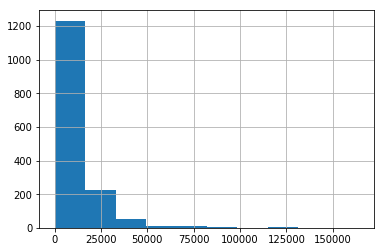

In [94]:
#Below is a chart of the distribution of the count of favorites when rating is >= 10 
df_m[df_m['rating_numerator'] >= 10].favorites.hist();

In [95]:
#Lets breifly look at the distribution and standard deviation to see if there 
#are any outliers. The above graph represents this as well.
df_m[df_m['rating_numerator'] >= 10].favorites.describe()

count      1539.000000
mean      10403.171540
std       13918.432958
min          78.000000
25%        2474.000000
50%        5524.000000
75%       13377.000000
max      164158.000000
Name: favorites, dtype: float64

The mean of the whole population is 8798.56 favorites while the mean of the favorites when the rating is greater than or equal to 10 is 10341.86. That is a pretty significant difference. Below you can see the mean of the favorites with a rating less than or equal to 10 is 2632.

In [96]:
#Look at the mean of the favorites for the ratings that are less than 10
df_m[df_m['rating_numerator'] < 10].favorites.mean()

2631.3970588235293

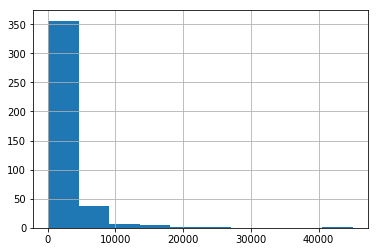

In [97]:
df_m[df_m['rating_numerator'] < 10].favorites.hist();

In [98]:
#Lets breifly look at the distribution and standard deviation to see if there 
#are any outliers. The graph above shows the same thing visually.
df_m[df_m['rating_numerator'] < 10].favorites.describe()

count      408.000000
mean      2631.397059
std       3506.585160
min        104.000000
25%        817.500000
50%       1727.500000
75%       3214.250000
max      45061.000000
Name: favorites, dtype: float64

In [99]:
#Look at difference between favorites means between ratings >= 10 and <10
print('The difference between favorite means when rating_numerator is >= 10 and less than 10 is', \
      (df_m[df_m['rating_numerator'] >= 10].favorites.mean())-(df_m[df_m['rating_numerator'] < 10].favorites.mean()))

The difference between favorite means when rating_numerator is >= 10 and less than 10 is 7771.774481137483


In [100]:
#Look at the difference between the total number of favorites of the rating categories
((df_m[df_m.rating_numerator >= 10].favorites).sum()) - ((df_m[df_m.rating_numerator < 10].favorites).sum())

14936871

##### Answers

As you can see above 7709.087 is a pretty large difference between the means of favorites (>=10 and <10). This shows that the higher rated dog photos are most likely to have a higher number of favorites. The number of tweets where the rating is less than 10 is 415 and the number of tweets where the rating is greater than or equal to 10 is 1658. There are almost 4 times as many tweets where the rating is >= 10 than <10. 

The standard deviation of favorites when the rating is <10 is 3480.97. However, when the rating is >=10 the standard deviation is 13,737.96.  In both cases the standard deviation is greater than the mean showing that there is a strong positive skew to the data.  There are also large outliers in both categories, >=10 and <10. 

In [101]:
df_m[df_m['rating_numerator'] < 10].favorites.describe()

count      408.000000
mean      2631.397059
std       3506.585160
min        104.000000
25%        817.500000
50%       1727.500000
75%       3214.250000
max      45061.000000
Name: favorites, dtype: float64

##### How many tweets are in category A (rating_numerator >=10) with a higher favorite count than the mean of category b (rating_numerator < 10)?

The mean or average number of favorites when the 'rating_numerator' is <10 is 1727. 

In [102]:
(df_m[df_m.rating_numerator >= 10].favorites>1727).sum()

1280

In [103]:
(df_m[df_m.rating_numerator < 10].favorites > 1727).sum()

204

In [104]:
#Proportion of the number of tweets in Category A that have a favorite count greater than the 
#mean favorite count of Category B
(1280/1539)

0.8317089018843404

##### Answer:
Above shows the number of tweets in Category A = 1280 while the number of tweets in Category B = 204.  There are 1280 more tweets in Category A than Category B that hold a favorite count over the mean of Category B (1727). There are 1539 total tweets with the rating numerator >=10.  There are only 408 tweets with the rating numerator <10.  Of the tweets with a rating numerator >=10, 83.17% have a favorite count greater than the mean favorite count with a rating numerator <10. 

In [105]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1947 entries, 0 to 1946
Data columns (total 21 columns):
Unnamed: 0            1947 non-null int64
tweet_id              1947 non-null int64
date                  1947 non-null object
time                  1947 non-null object
name                  1947 non-null object
rating_numerator      1947 non-null int64
rating_denominator    1947 non-null int64
favorites             1947 non-null int64
retweets              1947 non-null int64
dog_stage             1947 non-null object
p1                    1947 non-null object
p1_conf               1947 non-null float64
p1_dog                1947 non-null bool
p2                    1947 non-null object
p2_conf               1947 non-null float64
p2_dog                1947 non-null bool
p3                    1947 non-null object
p3_conf               1947 non-null float64
p3_dog                1947 non-null bool
img_num               1947 non-null int64
text                  1947 non-null object


#### What is the most common dog name?

In [106]:
df_m.name.value_counts()

None        511
a            54
Lucy         10
Cooper       10
Oliver       10
Charlie      10
Penny         9
Tucker        9
Sadie         8
Winston       8
Lola          7
the           7
Toby          7
Daisy         7
Bella         6
Stanley       6
Koda          6
Jax           6
Bo            6
Scout         5
Buddy         5
Oscar         5
Milo          5
an            5
Bailey        5
Chester       5
Louis         5
Dave          5
Rusty         5
Leo           5
           ... 
Quinn         1
Hermione      1
Huck          1
Lambeau       1
Sage          1
Storkson      1
Monkey        1
Lassie        1
Ginger        1
Levi          1
such          1
Chase         1
Thor          1
Darby         1
Swagger       1
Dallas        1
Fido          1
Aqua          1
Ridley        1
Ike           1
Asher         1
Ralphus       1
Jazz          1
Ron           1
Eve           1
Goliath       1
Mitch         1
Ebby          1
Zooey         1
Stark         1
Name: name, Length: 931,

#### Answers

There is a tie between Lucy, Cooper, Charlie and Oliver all with 10 each.

#### Of the most common dog names (40 total dogs), what are the types of dogs that those names are associated with?

In [107]:
name_analysis = (df_m.loc[df_m['name'].isin(['Cooper', 'Lucy', 'Charlie', 'Oliver'])]).p1

In [108]:
name_analysis.value_counts()

Golden Retriever                  6
Labrador Retriever                5
Whippet                           2
Great Dane                        2
Pekinese                          2
American Staffordshire Terrier    2
Chihuahua                         2
Toy Poodle                        2
Norfolk Terrier                   1
Chow                              1
Remote Control                    1
Shih-Tzu                          1
Shetland Sheepdog                 1
Leopard                           1
Dalmatian                         1
Malamute                          1
Bluetick                          1
Samoyed                           1
Pug                               1
Borzoi                            1
Washer                            1
Teddy                             1
Great Pyrenees                    1
Kelpie                            1
Norwich Terrier                   1
Name: p1, dtype: int64

#### Answer

The dog breed that that is represented most amoung the top 4 dog names is the Golden Retriever. The American Kennel Club, one of the most respected names in dog breeding and show dogs, rate the Golden Retriever as the 3rd most popular breed based on registration statistics they collect in 2016, 2017. Their number one rated dog is the Labrador Retreiver which came in second in our list at 5. According to the American Kennel Club the Labrador Retreiver has been the top breed since 1991. (https://www.akc.org/most-popular-breeds/) 

#### Is there any correlation between the number of favorites and retweets? 

In order to solve this problem I will do a scatter plot with the retweets and favorites on opposing axis.

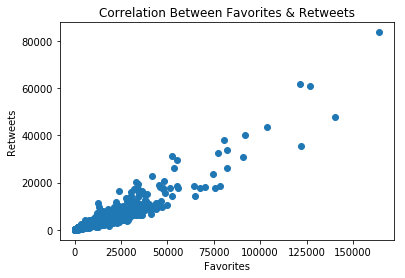

In [109]:
x = df_m['favorites']
y = df_m['retweets']

plt.scatter(x, y, data = df_m,),
plt.title('Correlation Between Favorites & Retweets'),
plt.xlabel('Favorites'),
plt.ylabel('Retweets');

#### What dog got the most tweets and retweets?

In [110]:
df_m.favorites.max()

164158

In [111]:
df_m.retweets.max()

83563

In [112]:
df_m.query("favorites == 164158")

,Unnamed: 0,tweet_id,date,time,name,rating_numerator,rating_denominator,favorites,retweets,dog_stage,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,img_num,text
762,762,744234799360020481,2016-06-18,18:26:18,None,13,10,164158,83563,doggo,...,0.825333,True,Ice Bear,0.044681,False,Whippet,0.018442,True,1,Here's a doggo realizing you can stand in a po...


In [113]:
df_m.query("favorites == 164158").p1

762    Labrador Retriever
Name: p1, dtype: object

#### Answer

The dog with the most retweets and favorites is the same dog.  It does not have a name but is associated with tweet_id 744234799360020481 and is a Labrador Retriever. As I stated in the previous answer, the American Kennel Club states that Labrador Retreivers are the most popular dog breed since 1991. 

In [114]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1947 entries, 0 to 1946
Data columns (total 21 columns):
Unnamed: 0            1947 non-null int64
tweet_id              1947 non-null int64
date                  1947 non-null object
time                  1947 non-null object
name                  1947 non-null object
rating_numerator      1947 non-null int64
rating_denominator    1947 non-null int64
favorites             1947 non-null int64
retweets              1947 non-null int64
dog_stage             1947 non-null object
p1                    1947 non-null object
p1_conf               1947 non-null float64
p1_dog                1947 non-null bool
p2                    1947 non-null object
p2_conf               1947 non-null float64
p2_dog                1947 non-null bool
p3                    1947 non-null object
p3_conf               1947 non-null float64
p3_dog                1947 non-null bool
img_num               1947 non-null int64
text                  1947 non-null object
